In [2]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import csv
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# File to Load
data_to_load = Path("Resources/Real_Estate_data.csv")

# Read Real Estate Data File and store into Pandas DataFrames
real_estate_data_df = pd.read_csv(data_to_load, low_memory=False)

# view the data
real_estate_data_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
0,2001,3/14/2002,East Haven,111 PROSPECT RD,84630,10000,8.463000,NaN,NaN,POINT (-72.87317 41.27318),130157,-72.8731,41.2731
1,2001,10/3/2001,Clinton,1 W WOODS DR,137100,260000,0.527308,NaN,NaN,POINT (-72.50679 41.28246),130158,-72.5067,41.2824
2,2001,10/31/2001,Middletown,148-150 WASHINGTON ST,131110,230000,0.570043,NaN,NaN,POINT (-72.65351 41.56143),130159,-72.6535,41.5614
3,2001,9/27/2002,Danbury,2 QUAIL RUN DR,200100,435000,0.460000,NaN,NaN,POINT (-73.50208 41.3951),130160,-73.5020,41.3951
4,2001,7/18/2002,Hartford,104-106 EDWARDS ST,61810,19500,3.169744,NaN,NaN,POINT (-72.68094 41.7755),130161,-72.6809,41.7755


In [3]:
#Filter Data to have just five most populated towns in CT "Bridgeport", "Stamford", "New Haven", "Hartford", "Waterbury"

narrow_df = real_estate_data_df[real_estate_data_df['Town'].isin(["Bridgeport", "Stamford", "New Haven", "Hartford", "Waterbury"])]
narrow_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
4,2001,7/18/2002,Hartford,104-106 EDWARDS ST,61810,19500,3.169744,NaN,NaN,POINT (-72.68094 41.7755),130161,-72.6809,41.7755
8,2001,6/21/2002,Hartford,17-19 EARLE ST,3360,10000,0.336000,NaN,NaN,POINT (-72.67124 41.79073),130165,-72.6712,41.7907
11,2001,5/30/2002,Bridgeport,652-654 MAPLE ST,38360,100000,0.383600,NaN,NaN,POINT (-73.17707 41.18811),130168,-73.1770,41.1881
14,2001,6/4/2002,Bridgeport,295 HANOVER ST,37660,60000,0.627667,NaN,NaN,POINT (-73.20239 41.17155),130171,-73.2023,41.1715
20,2001,4/8/2002,Bridgeport,246C PENNSYLVANIA AVE,19950,48410,0.412105,NaN,NaN,POINT (-73.17443 41.20893),130177,-73.1744,41.2089


In [6]:
narrow_df['List Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [104]:
# Filter out rows where the Year is between 2001 and 2005 (inclusive)
df_filtered = narrow_df[~narrow_df['List Year'].between(2001, 2007)]

In [106]:
df_filtered.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
79484,2008,8/5/2009,Hartford,2020 BROAD ST UNIT 8,19820,86000,0.230465,Condo,Condo,POINT (-72.68705 41.73678),205983,-72.6870,41.7367
79494,2008,6/22/2009,New Haven,548 ORANGE ST#401,171500,262500,0.653333,Condo,Condo,POINT (-72.9169 41.3153),206030,-72.9169,41.3153
79501,2008,2/4/2009,New Haven,29 NORTON ST,204750,95000,2.155263,NaN,NaN,POINT (-72.94891 41.31166),206049,-72.9489,41.3116
79503,2008,8/21/2009,Hartford,151 MANCHESTER ST,35390,85000,0.416353,Single Family,Single Family,POINT (-72.70223 41.79922),206054,-72.7022,41.7992
79523,2008,2/18/2009,New Haven,120 WILLARD ST,235200,63588,3.698811,Two Family,Two Family,POINT (-72.96516 41.32501),206161,-72.9651,41.3250


In [108]:
df_filtered["Residential Type"].unique()

array(['Condo', nan, 'Single Family', 'Two Family', 'Three Family',
       'Four Family'], dtype=object)

In [110]:
df_filtered_1 = df_filtered.dropna(subset=['Residential Type'])
df_filtered_1["Residential Type"].unique()

array(['Condo', 'Single Family', 'Two Family', 'Three Family',
       'Four Family'], dtype=object)

In [112]:
df_filtered_2 = df_filtered_1.dropna(subset=['Residential Type'])
df_filtered_2["Residential Type"].unique()

array(['Condo', 'Single Family', 'Two Family', 'Three Family',
       'Four Family'], dtype=object)

In [114]:
property_counts = df_filtered_2["Residential Type"].value_counts()
property_counts

Residential Type
Single Family    12478
Condo             6975
Two Family        3197
Three Family      2770
Four Family        360
Name: count, dtype: int64

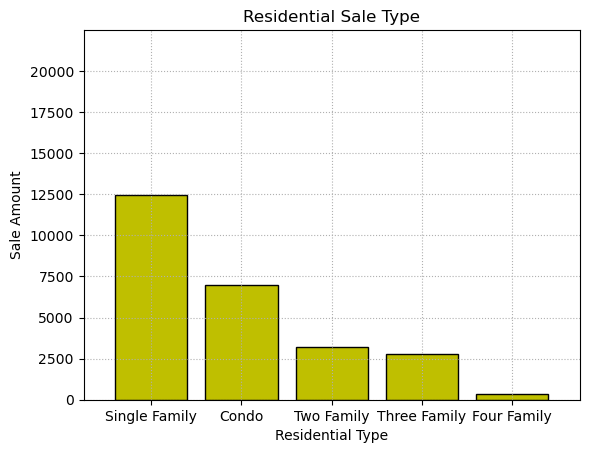

In [116]:
x_axis = property_counts.index
edgecolor = 'black'
plt.bar(x_axis, property_counts, color="y", align="center", ec=edgecolor)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(property_counts)+10000)
plt.title("Residential Sale Type")
plt.grid(True,linestyle=':', alpha=1)
plt.xlabel("Residential Type")
plt.ylabel("Sale Amount")

plt.show()

In [118]:
clean_df = pd.DataFrame(df_filtered_2)
clean_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
79484,2008,8/5/2009,Hartford,2020 BROAD ST UNIT 8,19820,86000,0.230465,Condo,Condo,POINT (-72.68705 41.73678),205983,-72.6870,41.7367
79494,2008,6/22/2009,New Haven,548 ORANGE ST#401,171500,262500,0.653333,Condo,Condo,POINT (-72.9169 41.3153),206030,-72.9169,41.3153
79503,2008,8/21/2009,Hartford,151 MANCHESTER ST,35390,85000,0.416353,Single Family,Single Family,POINT (-72.70223 41.79922),206054,-72.7022,41.7992
79523,2008,2/18/2009,New Haven,120 WILLARD ST,235200,63588,3.698811,Two Family,Two Family,POINT (-72.96516 41.32501),206161,-72.9651,41.3250
79557,2008,10/22/2008,Hartford,35 HARBISON AV,68530,299000,0.229197,Two Family,Two Family,POINT (-72.69537 41.75176),206267,-72.6953,41.7517


In [120]:
rs_data_df = pd.DataFrame(clean_df)
rs_data_df.head()

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Index,Longitude,Latitude
79484,2008,8/5/2009,Hartford,2020 BROAD ST UNIT 8,19820,86000,0.230465,Condo,Condo,POINT (-72.68705 41.73678),205983,-72.6870,41.7367
79494,2008,6/22/2009,New Haven,548 ORANGE ST#401,171500,262500,0.653333,Condo,Condo,POINT (-72.9169 41.3153),206030,-72.9169,41.3153
79503,2008,8/21/2009,Hartford,151 MANCHESTER ST,35390,85000,0.416353,Single Family,Single Family,POINT (-72.70223 41.79922),206054,-72.7022,41.7992
79523,2008,2/18/2009,New Haven,120 WILLARD ST,235200,63588,3.698811,Two Family,Two Family,POINT (-72.96516 41.32501),206161,-72.9651,41.3250
79557,2008,10/22/2008,Hartford,35 HARBISON AV,68530,299000,0.229197,Two Family,Two Family,POINT (-72.69537 41.75176),206267,-72.6953,41.7517


In [122]:
rs_data_df['Sale Amount'] = pd.to_numeric(rs_data_df['Sale Amount'], errors = 'coerce')
rs_data_res_type = rs_data_df.groupby('List Year')['Sale Amount'].sum()
rs_data_res_type

List Year
2008     149469808
2009     229837272
2010     233643942
2011     183948938
2012      69108209
2013     210332927
2014     223725392
2015     207644100
2016     217864571
2017     105933363
2018     244608885
2019      32211483
2020    1846265627
2021    2740773890
2022    2269643546
Name: Sale Amount, dtype: int64

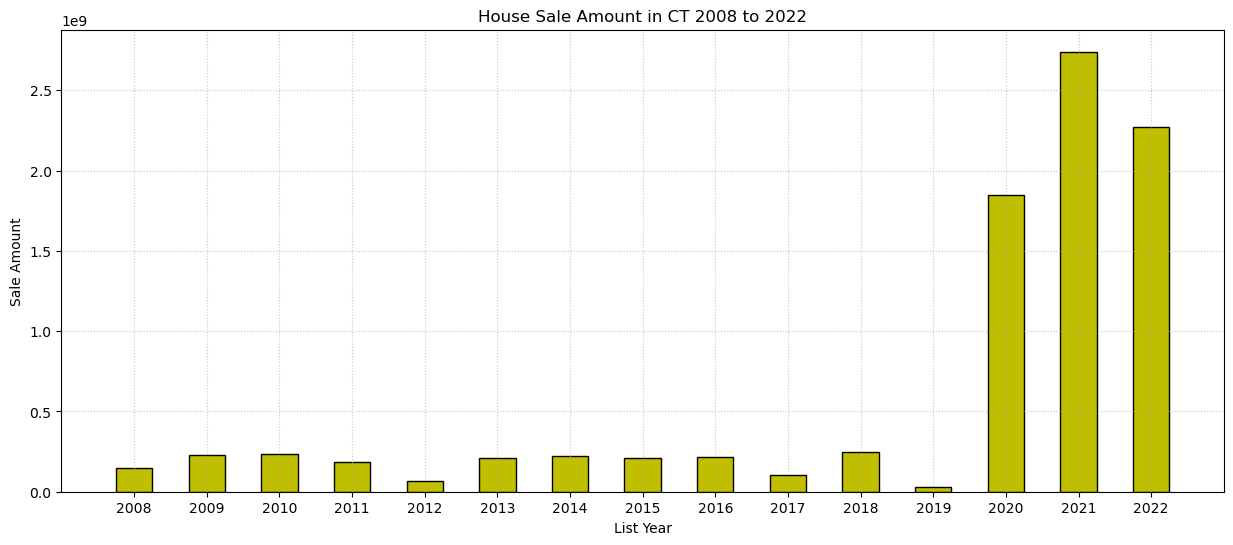

In [159]:
#Analysis by year w/ graph

fig = plt.figure(figsize=(15,6))
x = rs_data_res_type.index
y = rs_data_res_type

bar_width = 0.5
edgecolor = 'black'

bars = plt.bar(x, y, bar_width, color="y", ec=edgecolor, lw=1)
plt.ylabel('Sale Amount')
plt.xlabel('List Year')
plt.title('House Sale Amount in CT 2008 to 2022') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xlim(2007, x.max()+1)
plt.xticks(x, rs_data_res_type.index)

for bar in bars:
        height = bar.get_height()

plt.show()

In [144]:
#Find 6 towns in CT Bridgeport, Stamford, New Haven, Hartford, and Waterbury

In [146]:
rs_data_df['Sale Amount'] = pd.to_numeric(rs_data_df['Sale Amount'], errors = 'coerce')
rs_data_res_sale = rs_data_df.groupby('Town')['Sale Amount'].sum()
rs_data_res_sale

Town
Bridgeport    1305436308
Hartford       475274902
New Haven     1017633484
Stamford      5038260486
Waterbury     1128406773
Name: Sale Amount, dtype: int64

In [148]:
mean = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).mean()
median = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).median()
var = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).var()
std = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).std()
sem = rs_data_df['Assessed Value'].groupby(rs_data_df['Town']).sem()

sum_stat = pd.DataFrame({"Mean Assessed Value ":mean, 
                            "Median Assessed Value":median, 
                           "Assessed Value Variance":var, 
                           "Assessed Value Std. Dev.":std, 
                           "Assessed Value Std. Err.":sem})

sum_stat

,Mean Assessed Value,Median Assessed Value,Assessed Value Variance,Assessed Value Std. Dev.,Assessed Value Std. Err.
Town,,,,,
Bridgeport,142586.973670,137670.0,2.086487e+10,144446.788602,1926.642332
Hartford,68666.935297,52470.0,3.100155e+10,176072.580176,3585.858295
New Haven,160396.947246,137130.0,1.208896e+10,109949.828133,1768.102624
Stamford,360018.274893,313380.0,6.671820e+10,258298.673607,3085.056819
Waterbury,83216.097511,78850.0,1.764261e+09,42003.105833,506.723949


In [150]:
mean = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).mean()
median = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).median()
var = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).var()
std = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).std()
sem = rs_data_df['Sale Amount'].groupby(rs_data_df['Town']).sem()

sum_stat = pd.DataFrame({"Mean Sale ":mean, 
                            "Median Mean Sale ":median, 
                           "Sale Amount Variance":var, 
                           "Sale Amount Std. Dev.":std, 
                           "Sale Amount":sem})

sum_stat

,Mean Sale,Median Mean Sale,Sale Amount Variance,Sale Amount Std. Dev.,Sale Amount
Town,,,,,
Bridgeport,232242.716243,210000.0,3.997596e+10,1.999399e+05,2666.813593
Hartford,197127.707175,159900.0,9.365279e+10,3.060274e+05,6232.492207
New Haven,263158.387380,230000.0,4.007241e+10,2.001809e+05,3219.108748
Stamford,718724.748359,505000.0,8.951672e+12,2.991934e+06,35734.940187
Waterbury,164227.444768,155000.0,1.061433e+10,1.030259e+05,1242.900422


Slope (m): 21160.44
Y-intercept (b): -42237134.07


C:\Users\Rich\AppData\Local\Temp\ipykernel_832\3967630927.py:13: RuntimeWarning: overflow encountered in scalar multiply
  m = (n * np.sum(years * prices) - np.sum(years) * np.sum(prices)) / (n * np.sum(years**2) - np.sum(years)**2)


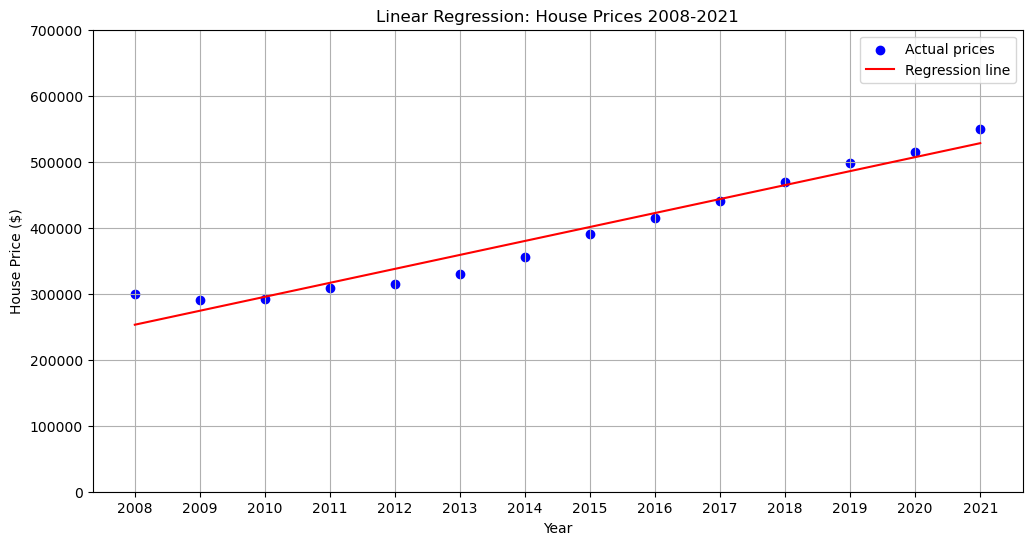

Predicted price for 2022: $549274.73


In [167]:

import numpy as np
import matplotlib.pyplot as plt

# Sample data
years = np.array(range(2008, 2022))  # Years from 2008 to 2021
prices = np.array([
    300000, 290000, 292000, 308000, 315000, 330000, 355000, 
    390000, 415000, 440000, 470000, 498000, 515000, 550000
])  # Sample house prices

# Calculate slope (m) and y-intercept (b)
n = len(years)
m = (n * np.sum(years * prices) - np.sum(years) * np.sum(prices)) / (n * np.sum(years**2) - np.sum(years)**2)
b = (np.sum(prices) - m * np.sum(years)) / n

# Print results
print(f"Slope (m): {m:.2f}")
print(f"Y-intercept (b): {b:.2f}")

# Predict prices
prices_pred = m * years + b

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(years, prices, color='blue', label='Actual prices')
plt.plot(years, prices_pred, color='red', label='Regression line')
plt.xlabel('Year')
plt.ylabel('House Price ($)')
plt.title('Linear Regression: House Prices 2008-2021')
plt.legend()

# Set y-axis limit to 700,000
plt.ylim(0, 700000)

# Set x-axis ticks to show all years
plt.xticks(years)

plt.grid(True)
plt.show()

# Predict price for 2022
predicted_price_2022 = m * 2022 + b
print(f"Predicted price for 2022: ${predicted_price_2022:.2f}")

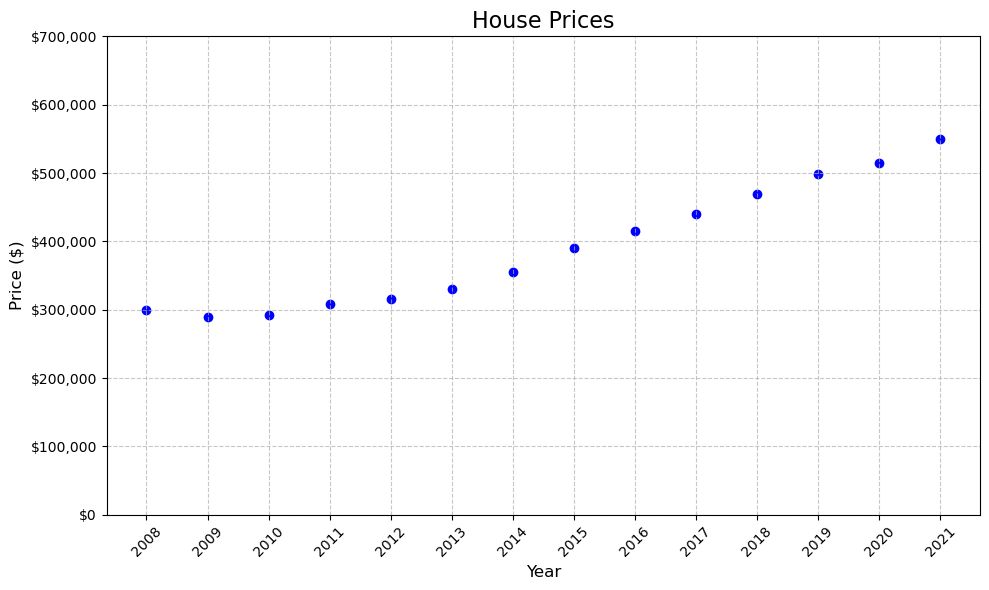

In [169]:
import matplotlib.pyplot as plt

# Data
years = list(range(2008, 2022))  # Years from 2008 to 2021
prices = [300000, 290000, 292000, 308000, 315000, 330000, 355000, 
          390000, 415000, 440000, 470000, 498000, 515000, 550000]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(years, prices, color='blue')

# Set the title and labels
plt.title('House Prices', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Set the y-axis limit to 700000
plt.ylim(0, 700000)

# Set x-axis ticks to show all years
plt.xticks(years, rotation=45)

# Format y-axis ticks as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#Visualize data/trend for house price

In [ ]:
#Analysis and comments/insights